In [1]:
# Libaries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
stock = 'AAPL'
start = '2006-01-01' 
end = '2023-12-31'
df = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['AAPL']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')


In [3]:
df.head() # the first 5 rows

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [4]:
df.tail() # the last 5 rows

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [5]:
df.shape # (rows, columns)

(0, 6)

In [6]:
df.columns # Shows names of columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
df.dtypes # Shows data types

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
df.info() # Shows information about DataFrame

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4529 entries, 2006-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4529 non-null   float64
 1   High       4529 non-null   float64
 2   Low        4529 non-null   float64
 3   Close      4529 non-null   float64
 4   Adj Close  4529 non-null   float64
 5   Volume     4529 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 247.7 KB


In [9]:
df.describe() # Shows summary statistics based on stock data 

,Open,High,Low,Close,Adj Close,Volume
count,4529.000000,4529.000000,4529.000000,4529.000000,4529.000000,4.529000e+03
mean,47.538782,48.054914,47.042808,47.570993,45.639918,3.853504e+08
std,54.029615,54.632516,53.475055,54.083295,53.909288,3.871897e+08
min,1.847500,1.888929,1.791429,1.809643,1.526519,2.404830e+07
25%,9.174643,9.275000,9.082143,9.174286,7.738940,1.054976e+08
50%,24.770000,25.055000,24.592501,24.860001,22.335144,2.285380e+08
75%,53.974998,54.685001,53.250000,53.865002,51.435848,5.500936e+08
max,198.020004,199.619995,197.000000,198.110001,197.144180,3.372970e+09


In [10]:

# Use only Adj. Closing
# Find the minimum
df['Adj Close'].min()

1.5265189409255981

In [11]:
# Find the maximum
df['Adj Close'].max()

197.14418029785156

In [12]:
# Find the average
df['Adj Close'].mean()

45.63991805593234

In [13]:
# Find the standard deviation
df['Adj Close'].std()

53.90928809046767

In [14]:
# Daily Returns
# Formula: (Today Price / Yesterday Price) - 1 
df['Daily_Returns'] = df['Adj Close'].shift(1) / df['Adj Close']  - 1
df['Daily_Returns'].head()

Date
2006-01-03         NaN
2006-01-04   -0.002934
2006-01-05    0.007932
2006-01-06   -0.025164
2006-01-09    0.003288
Name: Daily_Returns, dtype: float64

In [15]:
# Another way of calculating Daily Returns in simple way
DR = df['Adj Close'].pct_change(1) # 1 is for "One Day" in the past
DR.head()

Date
2006-01-03         NaN
2006-01-04    0.002943
2006-01-05   -0.007870
2006-01-06    0.025813
2006-01-09   -0.003277
Name: Adj Close, dtype: float64

In [16]:
# Log Returns
# Formula: log(Today Price/ Yesterday Price)
df['Log_Returns'] = np.log(df['Adj Close']) - np.log(df['Adj Close'].shift(1))

In [17]:
# Volume Weighted Average Price - VWAP
# http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:vwap_intraday
df['VWAP'] = round(np.cumsum(df['Volume']*(df['High']+df['Low'])/2) / np.cumsum(df['Volume']), 2)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_Returns,Log_Returns,VWAP
Date,,,,,,,,,
2006-01-03,2.585000,2.669643,2.580357,2.669643,2.251970,807234400,NaN,NaN,2.62
2006-01-04,2.683214,2.713571,2.660714,2.677500,2.258598,619603600,-0.002934,0.002939,2.65
2006-01-05,2.672500,2.675000,2.633929,2.656429,2.240824,449422400,0.007932,-0.007901,2.65
2006-01-06,2.687500,2.739286,2.662500,2.725000,2.298667,704457600,-0.025164,0.025486,2.67
2006-01-09,2.740357,2.757143,2.705000,2.716071,2.291134,675040800,0.003288,-0.003283,2.68


In [18]:
# Drawdown
# Drawdown shows the decline price since the stock began trading
# https://www.investopedia.com/terms/d/drawdown.asp
# There are 252 trading day in a year
window = 252

# Calculate the maximum drawdown
# Use the min_period of 1 (1 is the least valid observations) for the first 252 day in the data
Maximum_Drawdown = df['Adj Close'].rolling(window, min_periods=1).max()
Daily_Drawdown = df['Adj Close']/Maximum_Drawdown - 1.0

# Calculate the negative drawdown
Negative_Drawdown = Daily_Drawdown.rolling(window, min_periods=1).min()

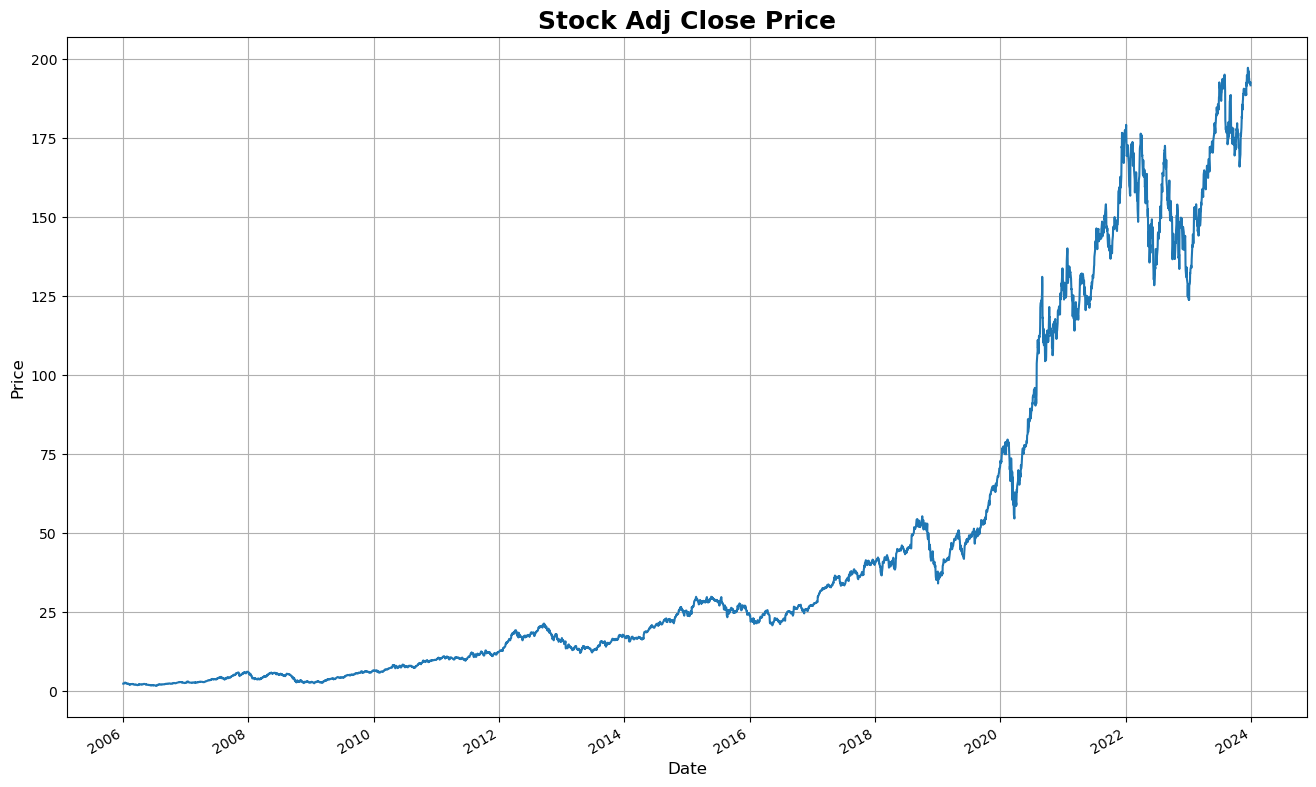

In [19]:
# Plot Simple Line Chart
# Plot Adj Close

plt.figure(figsize=(16,10))
df['Adj Close'].plot(grid=True)
plt.title("Stock Adj Close Price", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price",fontsize=12)
plt.show()

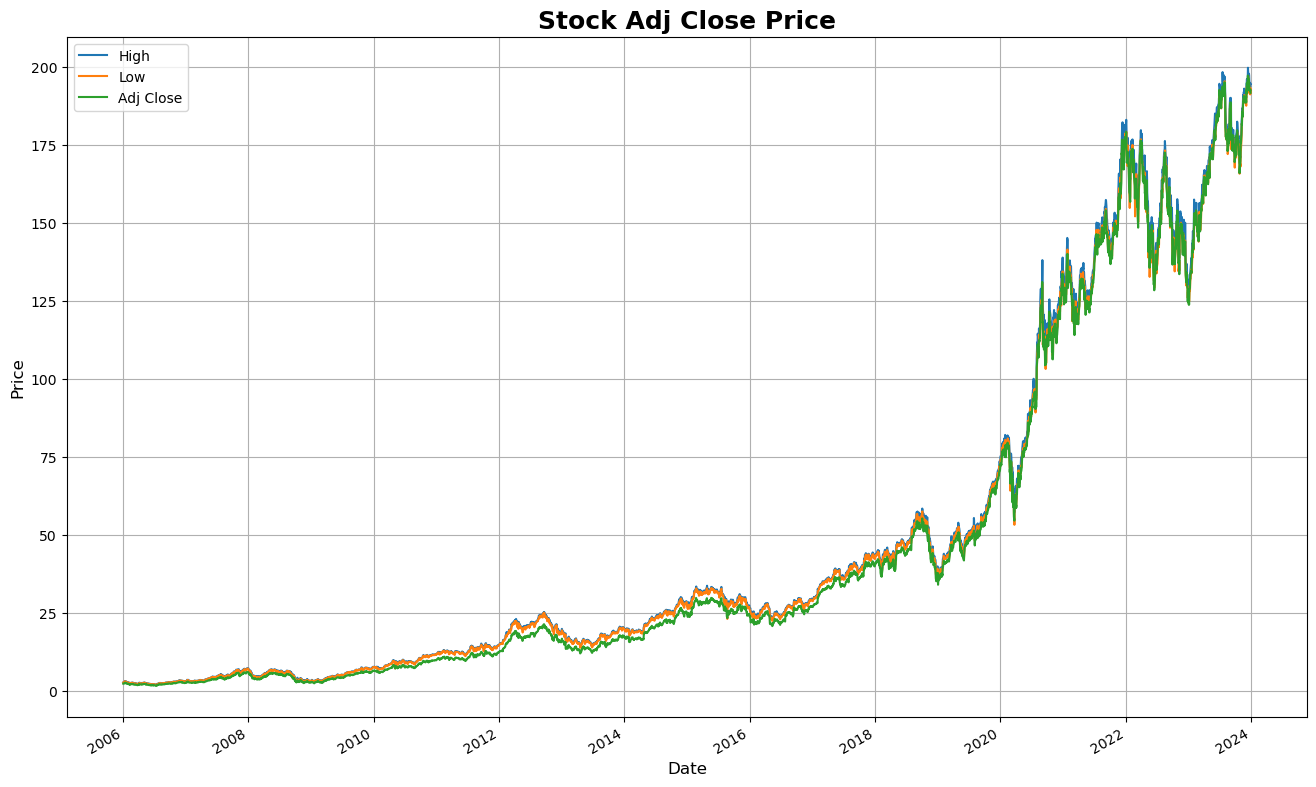

In [20]:
# Plot High, Low, Adj Close
df[['High', 'Low', 'Adj Close']].plot(figsize=(16,10), grid=True)
plt.title("Stock Adj Close Price", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()

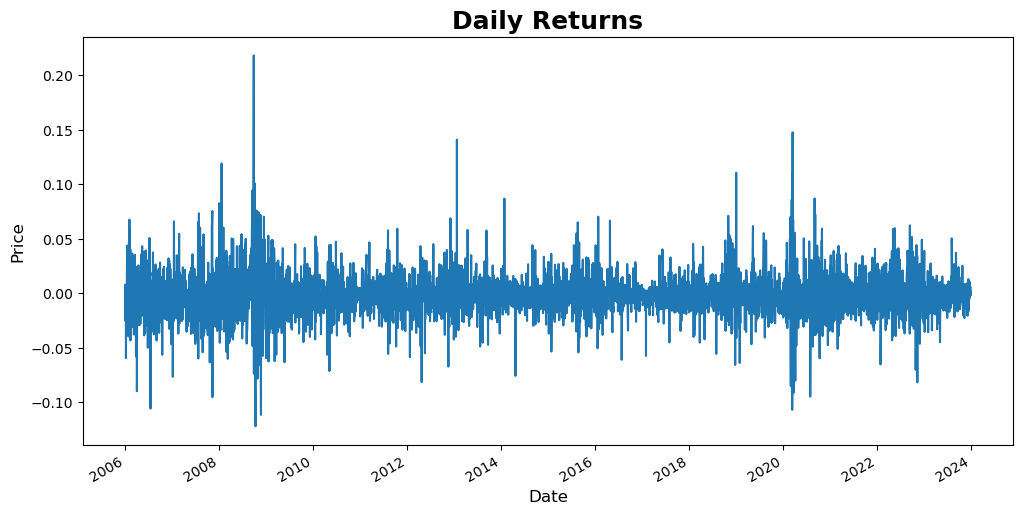

In [21]:
# Plot Daily Returns
df['Daily_Returns'].plot(figsize=(12,6))
plt.title("Daily Returns",fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()

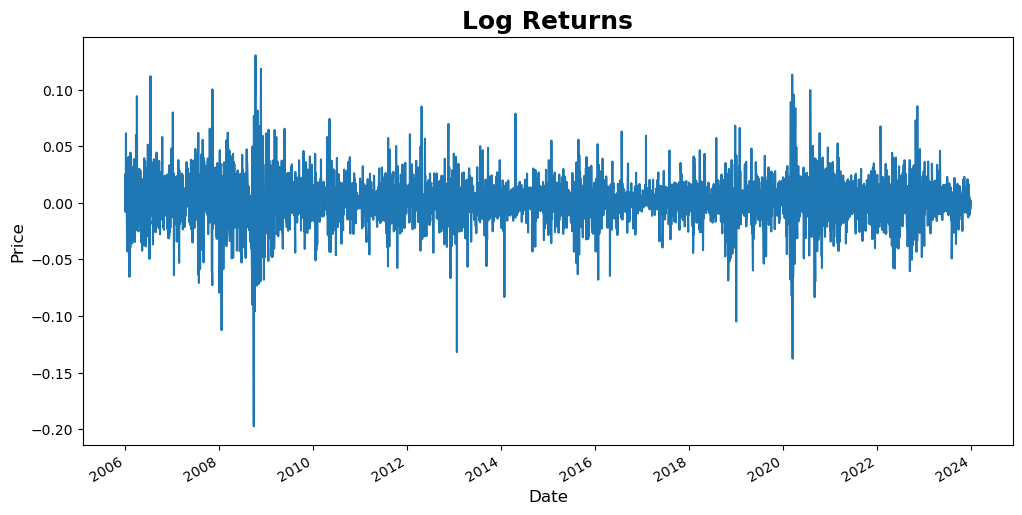

In [22]:
# Plot Log Returns
df['Log_Returns'].plot(figsize=(12,6))
plt.title("Log Returns", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()

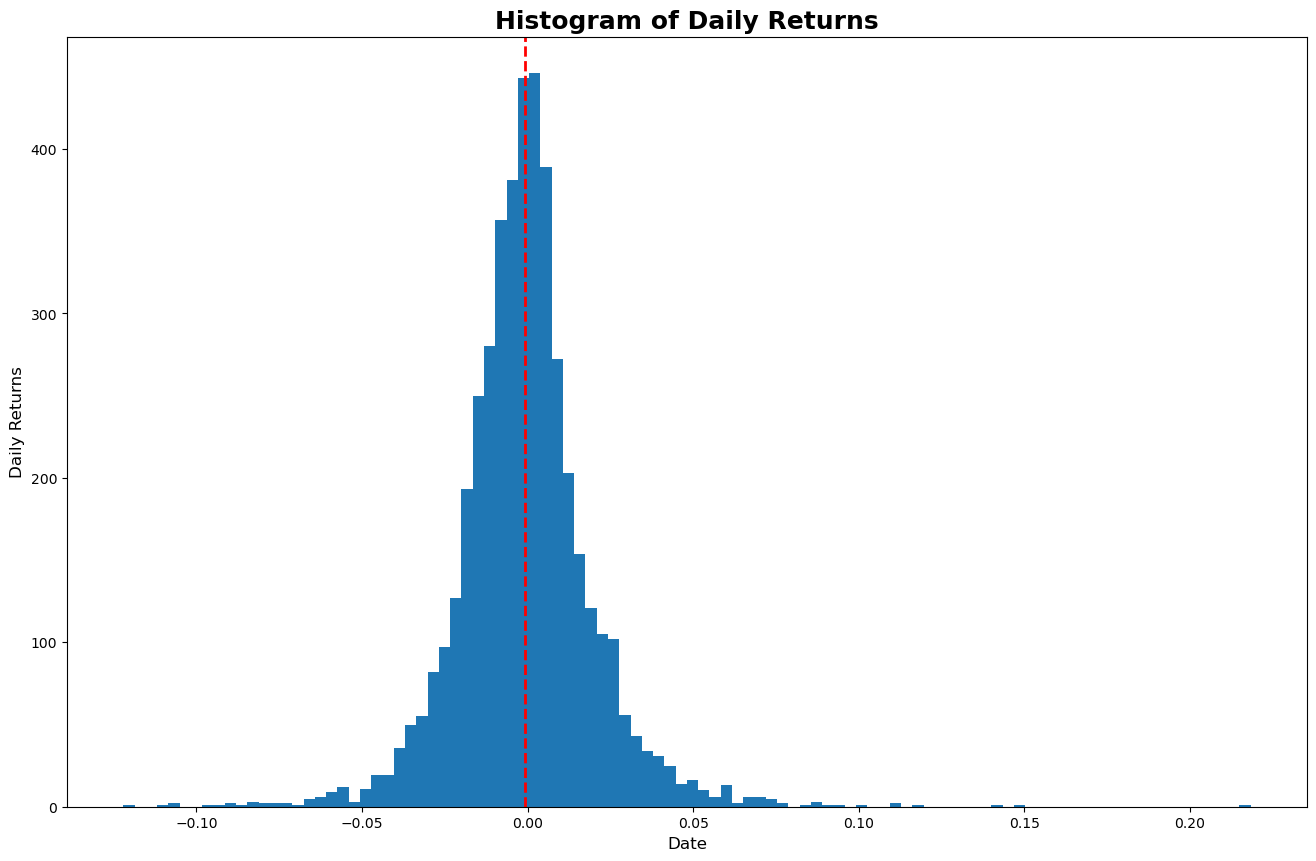

In [23]:
# Histogram of Daily Returns
# Histogram is distribution of numerical data and has a rectangle whose area is prportional to the frequency of a variable. 
plt.figure(figsize=(16,10))
plt.hist(df['Daily_Returns'].dropna(), bins=100, label='Daily Returns data') # Drop NaN
plt.title("Histogram of Daily Returns", fontsize=18, fontweight='bold')
plt.axvline(df['Daily_Returns'].mean(), color='r', linestyle='dashed', linewidth=2) # Shows the average line
plt.xlabel("Date", fontsize=12)
plt.ylabel("Daily Returns", fontsize=12)
plt.show()

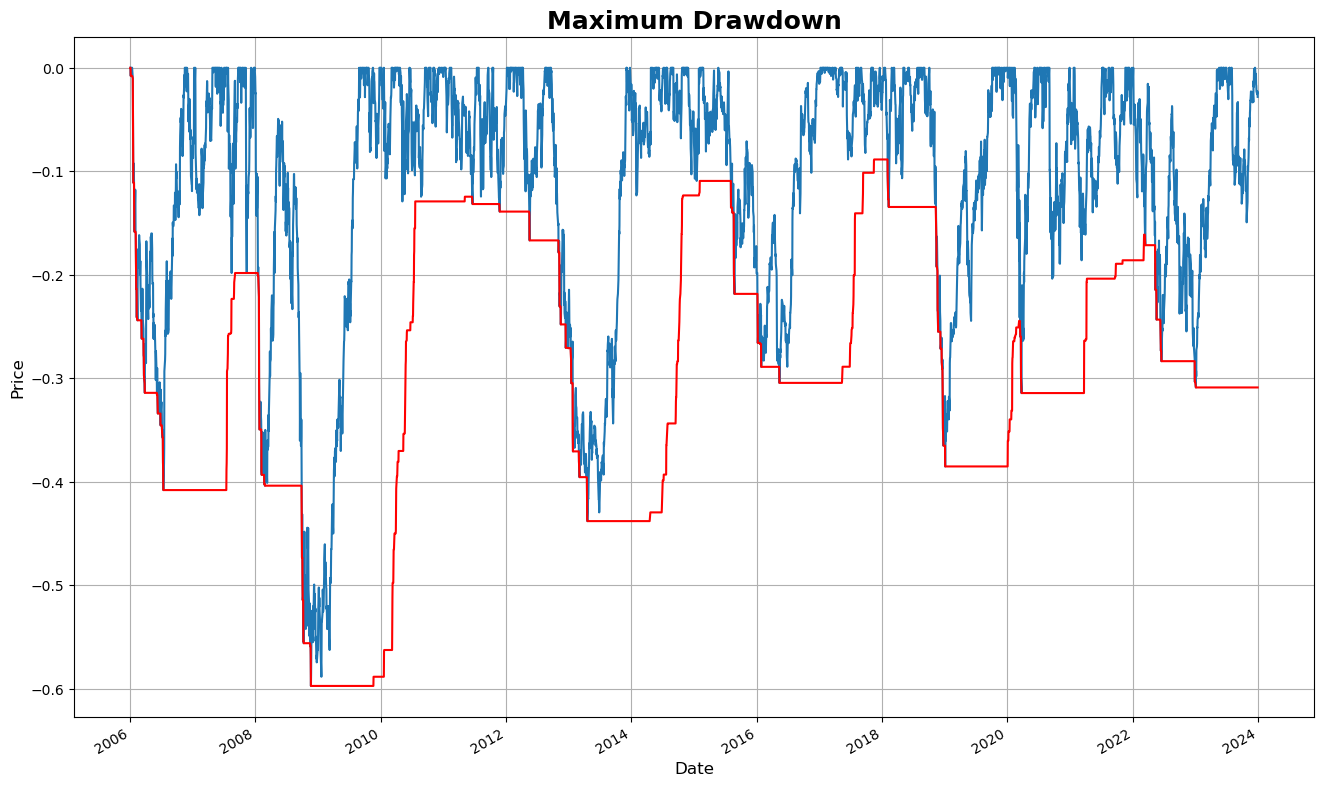

In [24]:
# Plot Drawdown
plt.figure(figsize=(16,10))
Daily_Drawdown.plot()
Negative_Drawdown.plot(color='r',grid=True) 
plt.title("Maximum Drawdown", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()

In [25]:
# https://www.investopedia.com/exam-guide/series-65/quantitative-methods/holding-period-return.asp
# Formula: (Ending Value of Investment + Dividend - Beginning Value of Investment) / Beginning Value of Investment
# To get dividend in Yahoo!
DIV = yf.download(stock, start, end, actions=True)['Dividends']

[*********************100%%**********************]  1 of 1 completed


In [26]:
# See how much dividends and splits was given during the time period
DIV

Date
2006-01-03    0.0
2006-01-04    0.0
2006-01-05    0.0
2006-01-06    0.0
2006-01-09    0.0
             ... 
2023-12-22    0.0
2023-12-26    0.0
2023-12-27    0.0
2023-12-28    0.0
2023-12-29    0.0
Name: Dividends, Length: 4529, dtype: float64

In [27]:
# Add all the dividend
Total_Dividend = DIV.sum()
Total_Dividend

7.749645

In [28]:
# You invest beginning 2015 and sold it end of 2017
HPR = (df['Adj Close'][502] + Total_Dividend - df['Adj Close'][0]) / df['Adj Close'][0]
HPR

5.047828659660963

In [29]:
# You can use round for 4 decimal points
print('Holding Period Return: ', str(round(HPR,4)*100)+"%")

Holding Period Return:  504.78%


In [30]:
MSFT =  yf.download('MSFT', start, end)['Adj Close'] # Use Adj Close only
MSFT_DIV = yf.download('MSFT', start, end, actions=True)['Dividends']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [31]:
MSFT.head() # Shows only Date and Adj Close

Date
2006-01-03    18.853117
2006-01-04    18.944429
2006-01-05    18.958485
2006-01-06    18.902281
2006-01-09    18.867165
Name: Adj Close, dtype: float64

In [32]:
MSFT_DIV # Shows how much dividend was given

Date
2006-01-03    0.0
2006-01-04    0.0
2006-01-05    0.0
2006-01-06    0.0
2006-01-09    0.0
             ... 
2023-12-22    0.0
2023-12-26    0.0
2023-12-27    0.0
2023-12-28    0.0
2023-12-29    0.0
Name: Dividends, Length: 4529, dtype: float64

In [33]:
MSFT_Dividend = MSFT_DIV.sum()
MSFT_Dividend

23.62

In [34]:
# You invest beginning 2015 and sold it end of 2017
MSFT_HPR = (MSFT[502] + Total_Dividend - MSFT[0]) / MSFT[0]
MSFT_HPR

0.7603453903120484

In [35]:
# You can use round for 4 decimal points
print('APPLE Holding Period Return: ', str(round(HPR,4)*100)+"%")
print('MICROSOFT Holding Period Return: ', str(round(MSFT_HPR,4)*100)+"%")

APPLE Holding Period Return:  504.78%
MICROSOFT Holding Period Return:  76.03%


In [36]:
C1=str(round(HPR,4)*100)
C2=str(round(MSFT_HPR,4)*100)

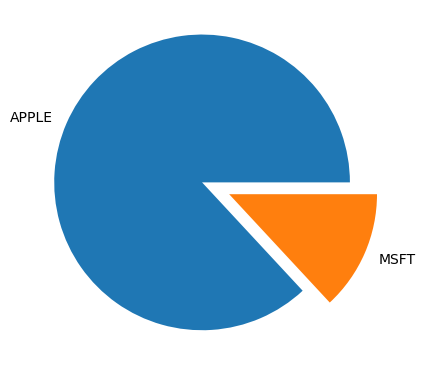

In [37]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([C1,C2])
mylabels = ["APPLE", "MSFT"]
myexplode = [0.2, 0]

plt.pie(y, labels = mylabels, explode = myexplode)
plt.show() 

In [38]:
GOOG =  yf.download('GOOG', start, end)['Adj Close'] # Use Adj Close only
GOOG_DIV = yf.download('GOOG', start, end, actions=True)['Dividends']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [39]:
GOOG.head() # Shows only Date and Adj Close

Date
2006-01-03    10.801310
2006-01-04    11.049730
2006-01-05    11.198636
2006-01-06    11.556504
2006-01-09    11.587278
Name: Adj Close, dtype: float64

In [40]:
GOOG_DIV # Shows how much dividend was given

Date
2006-01-03    0.0
2006-01-04    0.0
2006-01-05    0.0
2006-01-06    0.0
2006-01-09    0.0
             ... 
2023-12-22    0.0
2023-12-26    0.0
2023-12-27    0.0
2023-12-28    0.0
2023-12-29    0.0
Name: Dividends, Length: 4529, dtype: float64

In [41]:
GOOG_Dividend = GOOG_DIV.sum()
GOOG_Dividend

0.0

In [42]:
# You invest beginning 2015 and sold it end of 2017
GOOG_HPR = (GOOG[502] + Total_Dividend - GOOG[0]) / GOOG[0]
GOOG_HPR

1.2917894672661845

In [43]:
print('APPLE Holding Period Return: ', str(round(HPR,4)*100)+"%")
print('MICROSOFT Holding Period Return: ', str(round(MSFT_HPR,4)*100)+"%")
print('GOOGLE Holding Period Return: ', str(round(GOOG_HPR,4)*100)+"%")


APPLE Holding Period Return:  504.78%
MICROSOFT Holding Period Return:  76.03%
GOOGLE Holding Period Return:  129.18%


In [44]:
C1=str(round(HPR,4)*100)
C2=str(round(MSFT_HPR,4)*100)
C3=str(round(GOOG_HPR,4)*100)

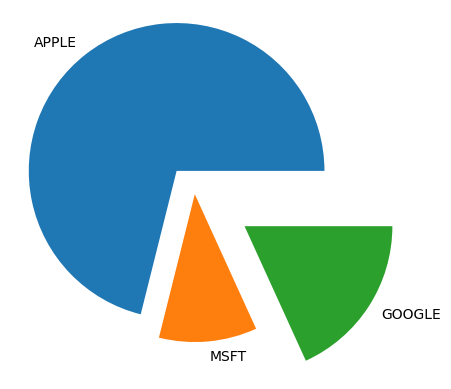

In [45]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([C1,C2,C3])
mylabels = ["APPLE", "MSFT","GOOGLE"]
myexplode = [0.2, 0,0.4]

plt.pie(y, labels = mylabels, explode = myexplode)
plt.show() 